# K-Nearest Neighbor

In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
iris = datasets.load_iris()
np_data = iris['data']
np_target = iris['target']

print(np_data.shape)
print(np_target.shape)

(150, 4)
(150,)


In [11]:
# Combine data and target into a DataFrame
np_d = np.concatenate((np_data, np_target.reshape(-1,1)), axis = 1)
df=pd.DataFrame(data= np_d, columns= iris['feature_names'] + ['target'])
print(df.head(5))	

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


# Exploratory Data Analysis

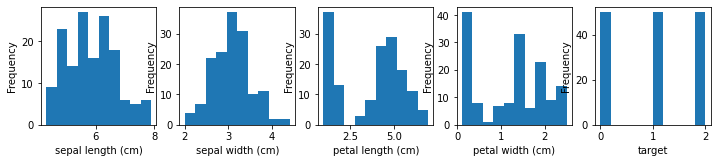

In [12]:
#Histograms
fig = plt.figure(figsize=(12, 10))
i=0
for column in df:
    sub=fig.add_subplot(4,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

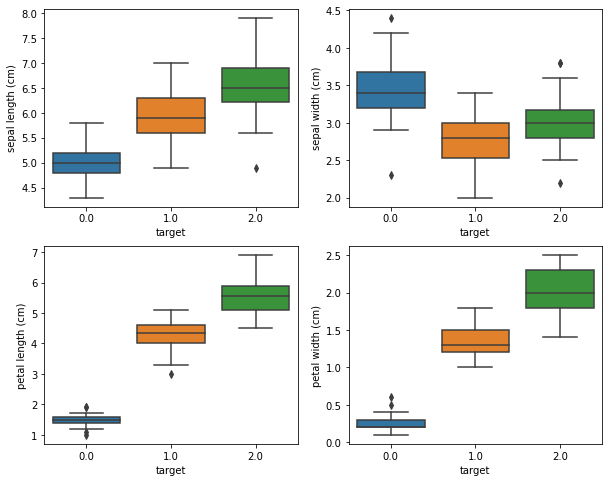

In [13]:
# Boxplots

num_list=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
fig=plt.figure(figsize=(10, 8))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,2,i+1)
    sns.boxplot(x='target',y=column, data=df)

In [14]:
print(df.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


In [15]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif
x = df.loc[:, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df.loc[:, 'target']

fs = SelectKBest(score_func=f_classif, k='all')  # call the method
FeaturesS = fs.fit(x, y)    # train the model
np.set_printoptions(suppress = True)
print(FeaturesS.scores_)    # print out the scores 
print(FeaturesS.pvalues_)

[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
[0. 0. 0. 0.]


From the scores, I will choose petal length and sepal width as predictors

In [16]:
# Normalize the data
x_final = df.loc[:, ['sepal width (cm)', 'petal length (cm)']]
from sklearn.preprocessing import MinMaxScaler
nor_x= MinMaxScaler()    
x_scaled= nor_x.fit_transform(x_final)    

In [19]:
print(x_scaled)

[[0.625      0.06779661]
 [0.41666667 0.06779661]
 [0.5        0.05084746]
 [0.45833333 0.08474576]
 [0.66666667 0.06779661]
 [0.79166667 0.11864407]
 [0.58333333 0.06779661]
 [0.58333333 0.08474576]
 [0.375      0.06779661]
 [0.45833333 0.08474576]
 [0.70833333 0.08474576]
 [0.58333333 0.10169492]
 [0.41666667 0.06779661]
 [0.41666667 0.01694915]
 [0.83333333 0.03389831]
 [1.         0.08474576]
 [0.79166667 0.05084746]
 [0.625      0.06779661]
 [0.75       0.11864407]
 [0.75       0.08474576]
 [0.58333333 0.11864407]
 [0.70833333 0.08474576]
 [0.66666667 0.        ]
 [0.54166667 0.11864407]
 [0.58333333 0.15254237]
 [0.41666667 0.10169492]
 [0.58333333 0.10169492]
 [0.625      0.08474576]
 [0.58333333 0.06779661]
 [0.5        0.10169492]
 [0.45833333 0.10169492]
 [0.58333333 0.08474576]
 [0.875      0.08474576]
 [0.91666667 0.06779661]
 [0.45833333 0.08474576]
 [0.5        0.03389831]
 [0.625      0.05084746]
 [0.66666667 0.06779661]
 [0.41666667 0.05084746]
 [0.58333333 0.08474576]


In [22]:
# Build a KNN model
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_scaled, y) 

KNeighborsClassifier(n_neighbors=1)

In [35]:
#---make predictions for each points on the coordinate--
xx, yy = np.meshgrid(np.arange(start = 0, stop = 1.01, step=0.01),np.arange(start=0, stop = 1.01, step = 0.01))  

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

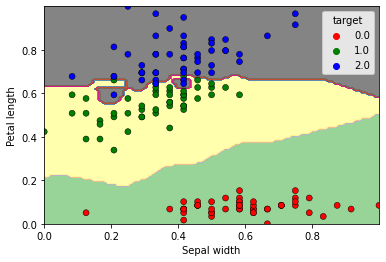

In [36]:
#---draw the result using a color plot---

plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
sns.scatterplot(
        x=x_scaled[:, 0],
        y=x_scaled[:, 1],
        hue=y,
        palette=['red', 'green', 'blue'],
        alpha=1.0,
        edgecolor="black",
    )

plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.xticks(np.arange(0, 1, step=0.2))
plt.yticks(np.arange(0, 1, step=0.2))
plt.show()

In [38]:
# Check the effect of changing the k value. 
def plot_knn(k):
    from sklearn.neighbors import KNeighborsClassifier  
    classifier= KNeighborsClassifier(n_neighbors=k)  
    classifier.fit(x_scaled, y) 
    
    #---make predictions for each of the points in xx,yy---
    xx, yy = np.meshgrid(np.arange(start = 0, stop = 1.01, step=0.01),np.arange(start=0, stop = 1.01, step = 0.01))  
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Accent, alpha=0.8)

    #---plot the training points---
    sns.scatterplot(
            x=x_scaled[:, 0],
            y=x_scaled[:, 1],
            hue=y,
            palette=['red', 'green', 'blue'],
            alpha=1.0,
            edgecolor="black",
        )

    plt.xlabel('Sepal width')
    plt.ylabel('Petal length')
    plt.xticks(np.arange(0, 1, step=0.2))
    plt.yticks(np.arange(0, 1, step=0.2))
    plt.show()

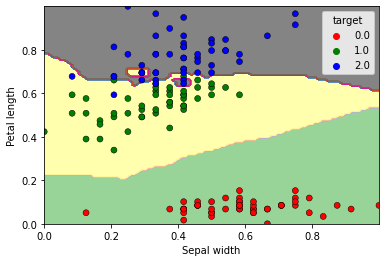

In [39]:
plot_knn(2)

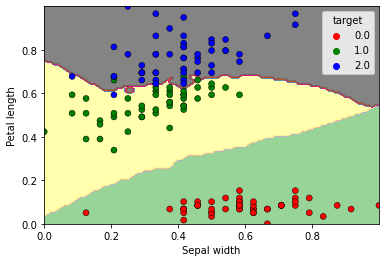

In [40]:
plot_knn(3)

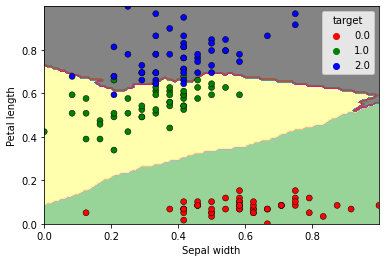

In [44]:
plot_knn(10)

In [53]:
# The limitation of a one-time train_test_split. Try to change the random_sate and re-run this code to see how the accuracy_score changes.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=60, stratify=y)

from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=1)  
classifier.fit(x_train, y_train) 

y_predicted = classifier.predict(x_test)
accuracy_score(y_test, y_predicted)

0.8333333333333334

In [55]:
# Use 10 folds cross_validation for k=1
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=1)
cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
print(cv_scores.mean())

0.9066666666666668


In [56]:
# Use 10 folds cross_validation for k at different values.

k_values = []  # create a list to store the k-values
for i in range(1, 20):
    if i%3 !=0:    # k-value shall not be multiples of 3 beccause there are 3 classes. 
        k_values.append(i)
print(k_values)

[1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17, 19]


In [57]:
k_accuracy_scores = []  # use this list to save the accuracy scores. 

for k in k_values:   # use a loop to iterate the k values. 
    from sklearn.model_selection import cross_val_score
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean()) 

# use a DataFrame to save k-values vs. each accuracy score. 
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy']) 

In [58]:
print(df_k_scores)
# with this result, the optimal k is 5. 

       k  accuracy
0    1.0  0.906667
1    2.0  0.886667
2    4.0  0.940000
3    5.0  0.953333
4    7.0  0.940000
5    8.0  0.940000
6   10.0  0.926667
7   11.0  0.933333
8   13.0  0.946667
9   14.0  0.946667
10  16.0  0.933333
11  17.0  0.946667
12  19.0  0.946667


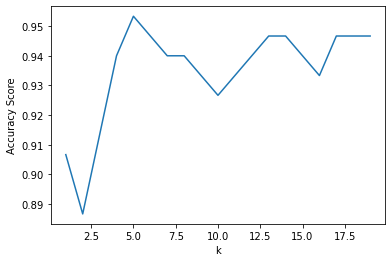

In [59]:
plt.plot(df_k_scores.loc[:, 'k'], df_k_scores.loc[:, 'accuracy'])
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.show()